In [1]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab working files/Lifecycle_Analysis_FIX_CP.csv'

df = pd.read_csv(file_path)

df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Cust Host Id,fix_start_dt,mob_contract_start_dt,days_difference
0,504077,NaN,28.08.2024,NaN
1,505389,NaN,21.08.2024,NaN
2,507036,NaN,31.12.2024,NaN
3,508191,NaN,01.04.2024,NaN
4,513844,NaN,27.12.2024,NaN


In [2]:
total_mobility_customers = df['mob_contract_start_dt'].notnull().sum()

product_customers = df['fix_start_dt'].notnull().sum()

conversion_percentage = (product_customers / total_mobility_customers) * 100

print(f"Total Mobility Customers: {total_mobility_customers}")
print(f"Total Product Customers: {product_customers}")
print(f"Conversion Percentage: {conversion_percentage:.2f}%")


Total Mobility Customers: 38721
Total Product Customers: 1308
Conversion Percentage: 3.38%


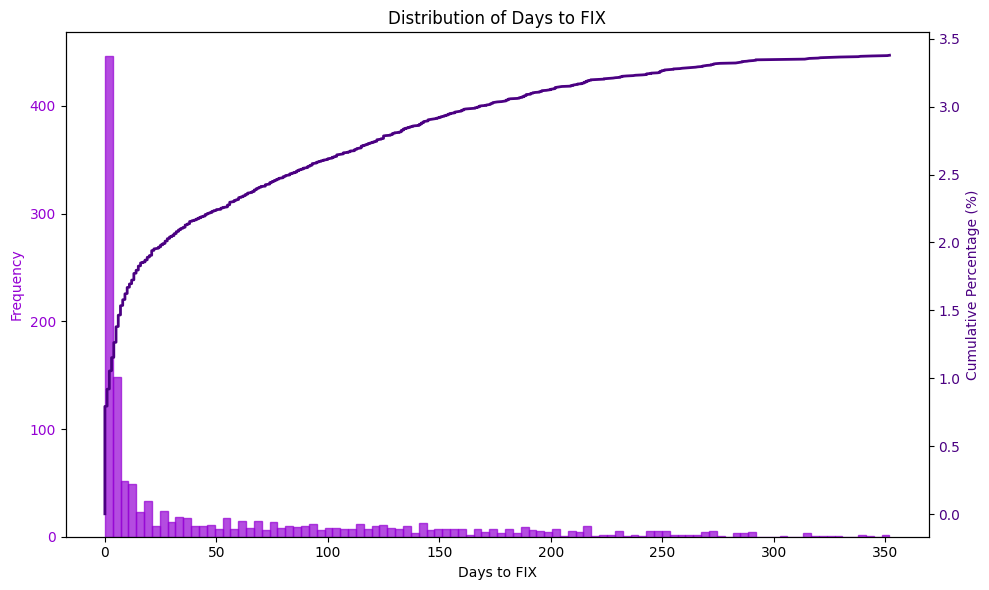

In [3]:
import matplotlib.pyplot as plt
import numpy as np

total_customers = len(df)

df_converted = df[df['days_difference'].notnull()]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(
    df_converted['days_difference'],
    bins=100,
    edgecolor='darkviolet',
    alpha=0.7,
    color='darkviolet'
)

ax1.set_title('Distribution of Days to FIX')
ax1.set_xlabel('Days to FIX')
ax1.set_ylabel('Frequency', color='darkviolet')
ax1.tick_params(axis='y', labelcolor='darkviolet')

ax2 = ax1.twinx()

sorted_days_converted = np.sort(df_converted['days_difference'])
cumulative_percentage_all = (
    np.arange(1, len(sorted_days_converted) + 1) / total_customers * 100
)

ax2.plot(
    sorted_days_converted,
    cumulative_percentage_all,
    color='indigo',
    linewidth=2,
    label='Cumulative Percentage (All Customers)'
)

ax2.set_ylabel('Cumulative Percentage (%)', color='indigo')
ax2.tick_params(axis='y', labelcolor='indigo')

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

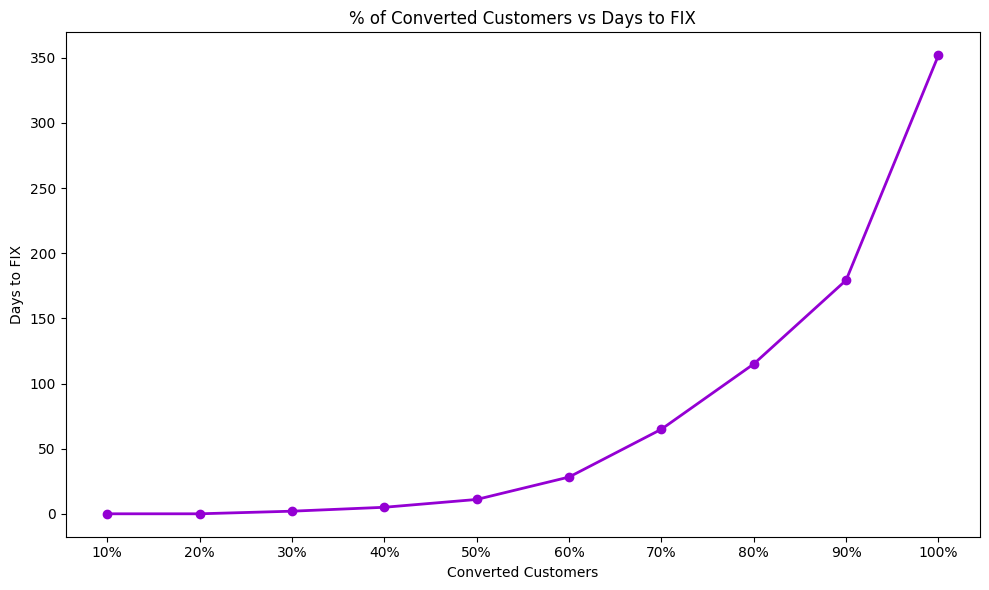

In [4]:
import matplotlib.pyplot as plt

# Define percentiles and calculate their corresponding values for converted customers
percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
percentile_values = df[df['days_difference'].notnull()]['days_difference'].quantile(percentiles)

plt.figure(figsize=(10, 6))
plt.plot(percentiles, percentile_values, marker='o', color='darkviolet', linestyle='-', linewidth=2)

plt.title('% of Converted Customers vs Days to FIX')
plt.xlabel('Converted Customers')
plt.ylabel('Days to FIX')
plt.xticks(percentiles, labels=[f"{int(p*100)}%" for p in percentiles])
plt.grid(False)

plt.tight_layout()
plt.show()

In [5]:

converted_df = df.dropna(subset=['fix_start_dt'])

converted_df_sorted = converted_df.sort_values(by='days_difference')

percentiles = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0]
percentile_values = converted_df_sorted['days_difference'].quantile(percentiles)

percentile_diff = percentile_values.diff().fillna(0)

percentile_table = pd.DataFrame({
    'Percentile': [f"{int(p*100)}%" for p in percentiles],
    'Days Difference': percentile_values.values,
    'Difference from Previous Percentile': percentile_diff.values
})

percentile_table

,Percentile,Days Difference,Difference from Previous Percentile
0,5%,0.00,0.00
1,10%,0.00,0.00
2,15%,0.00,0.00
3,20%,0.00,0.00
4,25%,1.00,1.00
5,30%,2.00,1.00
6,35%,4.00,2.00
7,40%,5.00,1.00
8,45%,7.00,2.00
9,50%,11.00,4.00


In [6]:
converted_df = df.dropna(subset=['fix_start_dt'])
converted_df_sorted = converted_df.sort_values(by='days_difference')
percentiles = [0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]
percentile_values = converted_df_sorted['days_difference'].quantile(percentiles)
percentile_diff = percentile_values.diff().fillna(0)
percentile_table = pd.DataFrame({
    'Percentile': [f"{int(p*100)}%" for p in percentiles],
    'Days Difference': percentile_values.values,
    'Difference from Previous Percentile': percentile_diff.values
})
percentile_table

,Percentile,Days Difference,Difference from Previous Percentile
0,0%,0.0,0.0
1,10%,0.0,0.0
2,20%,0.0,0.0
3,30%,2.0,2.0
4,40%,5.0,3.0
5,50%,11.0,6.0
6,60%,28.2,17.2
7,70%,64.9,36.7
8,80%,115.0,50.1
9,90%,179.3,64.3


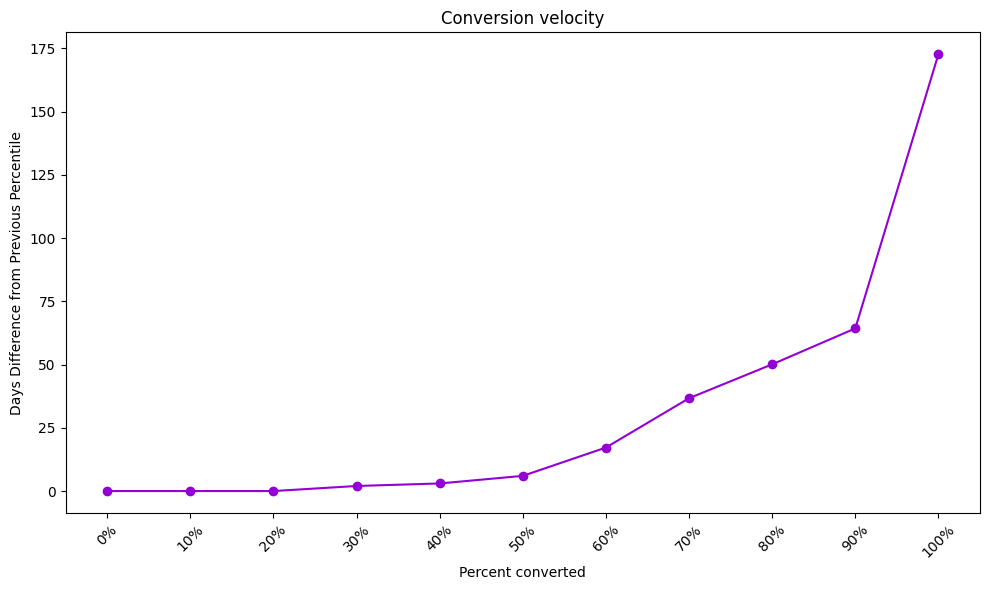

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(percentile_table['Percentile'], percentile_table['Difference from Previous Percentile'], marker='o', color='darkviolet', linestyle='-')

plt.xlabel('Percent converted')
plt.ylabel('Days Difference from Previous Percentile')
plt.title('Conversion velocity')
plt.xticks(rotation=45)
plt.grid(False)

plt.tight_layout()
plt.show()